In [72]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import scipy.stats as si
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

path = os.getcwd()
path = 'C:/Users/USER-PC/Documents/GitHub/homework/FE539'
S = 1500
rf = 0.0265
yields = pd.read_csv(path + '/yields.csv')
data = pd.read_csv(path + '/data.csv')
data = pd.read_csv(path + '/data.csv')
data = data[data['days'] < 501]
data = data[data['days'] > 10]
d1 = data[(data['type'] == 'C') & (data['strike'] < S)]
data = d1.append(data[(data['type'] == 'P') & (data['strike'] > S)])
data = data[data['strike'] > 1000]
data = data[data['strike'] < 2000]
data['strike'] = data['strike']/S
data['days'] = data['days']/365
callput = data['type'].values
T = (data['days']).values
K = (data['strike']).values
V = data['IV'].values
P = data['price'].values
len(data)

1329

In [73]:
def rbf_gaussian(x, c, beta):
    return np.exp(-beta*(np.linalg.norm(x-c)**2))

def rbf_multiquadratic(x, c, beta):
    return np.sqrt(np.linalg.norm(x-c)**2 + beta**2)

def rbf_thinplate(x, c, s):
    return ((np.linalg.norm(x-c))**2)*np.log(np.linalg.norm(x-c))

In [74]:
def kmeans(x, n):
    k_means = KMeans(n_clusters = n).fit(x)
    clusters = k_means.cluster_centers_
    labels = (k_means.labels_)
    distances = []
    for i in range(len(labels)):
        distances.append(np.linalg.norm(Xt[i] - clusters[labels[i]]))
    df = pd.DataFrame({'cluster':labels, 'distance':distances})
    stds = df.groupby(['cluster'])['distance'].std().values
    return clusters, stds



In [119]:
class RBFNet(object):
    def __init__(self, k = 5, lr = 0.05, epochs = 100, rbf = rbf_thinplate):
        self.k = k
        self.lr = lr
        self.epochs = epochs
        self.rbf = rbf
        
        self.w = np.random.randn(k)
        self.b = np.random.randn(1)
    def fit(self, X, y):
        self.centers = kmeans(X, self.k)[0]
        self.stds = kmeans(X, self.k)[1]
        
        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                a = np.array([self.rbf(X[i], c, s) for c, s in zip(self.centers, self.stds)])
                F = a.T.dot(self.w) + self.b
                e = -(y[i] - F)
                self.w = self.w - self.lr*a*e
                self.b = self.b - self.lr*e
    def predict(self, X):
        y_values = []
        for i in range(X.shape[0]):
            a = np.array([self.rbf(X[i], c, s) for c, s in zip(self.centers, self.stds)])
            y_values.append(a.T.dot(self.w) + self.b)
        return np.array(y_values)


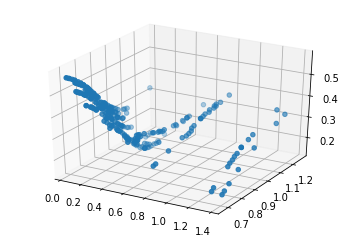

<Figure size 432x288 with 0 Axes>

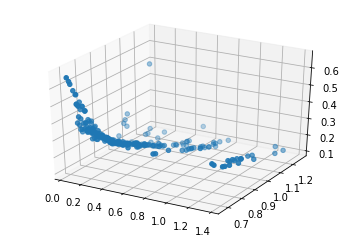

In [120]:
idx = np.random.randint(len(T), size=300)
K1 = Ka[idx]
T1 = Ta[idx]
V1 = Va[idx]
y = Va
Xt = np.array([Ta, Ka]).T
rbfn = RBFNet(k = 8)
rbfn.fit(Xt, Va)
XX = np.array([T1, K1]).T
y_pred = rbfn.predict(XX)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(T1, K1, y_pred)
plt.show()
plt.clf()

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(T1, K1, V1)
plt.show()